## Building an Artificial Neural Network model, to predict credit card defaulters for a month

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset and verification

In [2]:
credit_data = pd.read_csv("D:\ML-Datasets\Jigsaw\credit_default_data.csv")
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Check for any missing values
credit_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no missing values in the dataset

In [4]:
# Check the data structure
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29601 entries, 0 to 29600
Data columns (total 25 columns):
ID                            29601 non-null int64
LIMIT_BAL                     29601 non-null int64
SEX                           29601 non-null int64
EDUCATION                     29601 non-null int64
MARRIAGE                      29601 non-null int64
AGE                           29601 non-null int64
PAY_0                         29601 non-null int64
PAY_2                         29601 non-null int64
PAY_3                         29601 non-null int64
PAY_4                         29601 non-null int64
PAY_5                         29601 non-null int64
PAY_6                         29601 non-null int64
BILL_AMT1                     29601 non-null int64
BILL_AMT2                     29601 non-null int64
BILL_AMT3                     29601 non-null int64
BILL_AMT4                     29601 non-null int64
BILL_AMT5                     29601 non-null int64
BILL_AMT6               

In [5]:
# Check the summary statistics for applicable columns
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,...,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,14971.758927,167550.544914,1.603189,1.815479,1.555454,35.464072,-0.014932,-0.131313,-0.163440,-0.218303,...,43122.554204,40235.545184,38858.449816,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374,0.223134
std,8660.184430,129944.020953,0.489244,0.710399,0.518092,9.213243,1.124503,1.199642,1.199793,1.172220,...,64196.383913,60699.344884,59519.893043,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739,0.416355
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7474.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1780.000000,1278.000000,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000,0.000000
50%,14953.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19005.000000,18091.000000,17118.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22463.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54271.000000,50072.000000,49121.000000,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


### Data Explorations and Visualizations

0    22996
1     6605
Name: default payment next month, dtype: int64

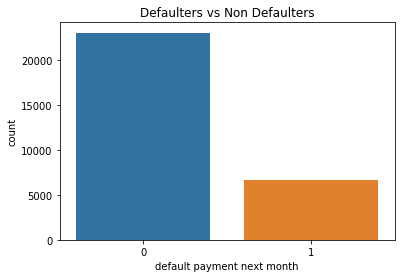

In [6]:
# Explore the target variable
sns.countplot(credit_data['default payment next month'])
plt.title("Defaulters vs Non Defaulters")

credit_data['default payment next month'].value_counts()

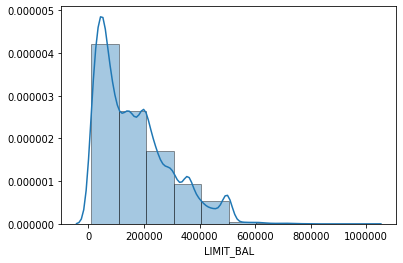

In [7]:
# Explore variable LIMIT_BAL

sns.distplot(credit_data['LIMIT_BAL'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

Highly negatively sekewed distribution. Most of the customers are at the lower end of the limit balance.

Text(0.5, 1, 'Distribution of LIMIT_BAL by defaulter status')

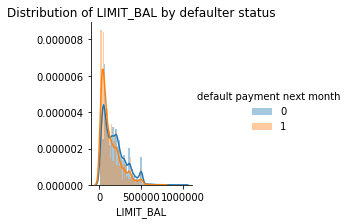

In [8]:
g = sns.FacetGrid(data=credit_data, hue='default payment next month')
g.map(sns.distplot, 'LIMIT_BAL').add_legend()
plt.title('Distribution of LIMIT_BAL by defaulter status')

There is an indication that defaulting customers have lower LIMIT_BAL

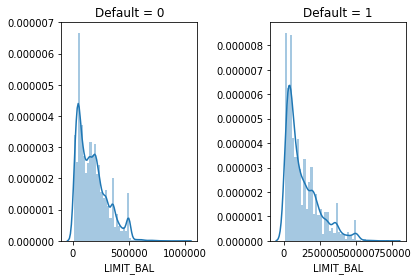

In [9]:
# Distribution of LIMIT_BAL by defaulter status (Another representation)

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.distplot(credit_data[credit_data['default payment next month'] == 0]['LIMIT_BAL'], ax=axes[0])
axes[0].set_title('Default = 0')
sns.distplot(credit_data[credit_data['default payment next month'] == 1]['LIMIT_BAL'], ax=axes[1])
axes[1].set_title('Default = 1')
plt.tight_layout()

In [10]:
credit_data.groupby('default payment next month').describe()['LIMIT_BAL']

,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,22996.0,178299.965211,131876.835217,10000.0,70000.0,150000.0,250000.0,1000000.0
1,6605.0,130125.311128,115424.107801,10000.0,50000.0,90000.0,200000.0,740000.0


Text(0.5, 1.0, 'Average LIMIT_BAL by defaulters')

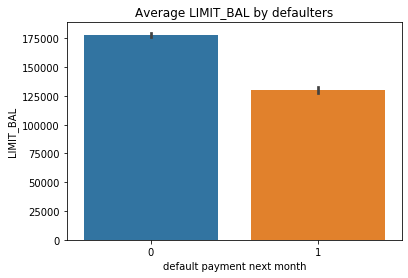

In [11]:
sns.barplot(x='default payment next month',y='LIMIT_BAL',data=credit_data)
plt.title('Average LIMIT_BAL by defaulters')

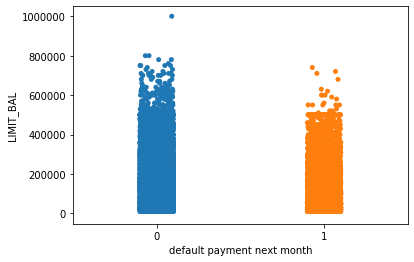

In [12]:
sns.stripplot(x='default payment next month',y='LIMIT_BAL',data=credit_data,jitter=True)

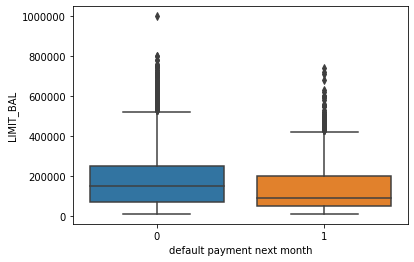

In [13]:
sns.boxplot(x='default payment next month',y='LIMIT_BAL',data=credit_data)

Distribution of Sex and Credit Default
default payment next month      0     1
SEX                                    
1                            8885  2861
2                           14111  3744


Proportional distribution of Sex and Credit Default
default payment next month         0         1
SEX                                           
1                           0.756428  0.243572
2                           0.790311  0.209689




Text(0.5, 1.0, 'SEX distribution by Defaulters')

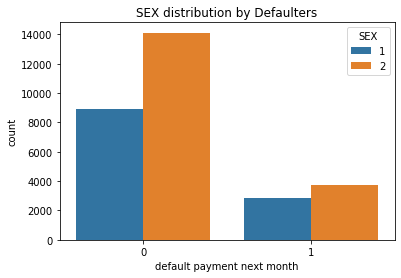

In [14]:
# Explore the SEX variable

print('Distribution of Sex and Credit Default')
print(pd.crosstab(credit_data['SEX'], credit_data['default payment next month']))
print("\n")
print("Proportional distribution of Sex and Credit Default")
print(pd.crosstab(credit_data['SEX'], credit_data['default payment next month']).apply(lambda r: r/r.sum(), axis=1))
print("\n")
sns.countplot(x='default payment next month', hue='SEX', data=credit_data)
plt.title('SEX distribution by Defaulters')

Distribution of EDUCATION and Credit Default
default payment next month      0     1
EDUCATION                              
1                            8545  2036
2                           10695  3329
3                            3640  1233
4                             116     7


Proportional distribution of EDUCATION and Credit Default
default payment next month         0         1
EDUCATION                                     
1                           0.807580  0.192420
2                           0.762621  0.237379
3                           0.746973  0.253027
4                           0.943089  0.056911




Text(0.5, 1.0, 'EDUCATION status by Defaulters')

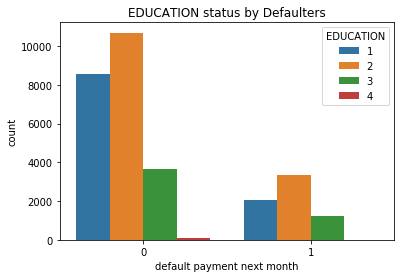

In [15]:
# Explore the EDUCATION variable

print('Distribution of EDUCATION and Credit Default')
print(pd.crosstab(credit_data['EDUCATION'], credit_data['default payment next month']))
print("\n")
print("Proportional distribution of EDUCATION and Credit Default")
print(pd.crosstab(credit_data['EDUCATION'], credit_data['default payment next month']).apply(lambda r: r/r.sum(), axis=1))
print("\n")
sns.countplot(x='default payment next month', hue='EDUCATION', data=credit_data)
plt.title('EDUCATION status by Defaulters')

Distribution of MARRIAGE and Credit Default
default payment next month      0     1
MARRIAGE                               
1                           10285  3192
2                           12477  3329
3                             234    84


Proportional distribution of MARRIAGE and Credit Default
default payment next month         0         1
MARRIAGE                                      
1                           0.763152  0.236848
2                           0.789384  0.210616
3                           0.735849  0.264151




Text(0.5, 1.0, 'MARRIAGE status by Defaulters')

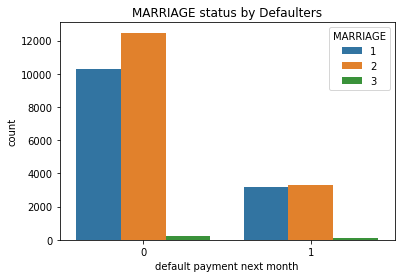

In [16]:
# Explore the MARRIAGE variable

print('Distribution of MARRIAGE and Credit Default')
print(pd.crosstab(credit_data['MARRIAGE'], credit_data['default payment next month']))
print("\n")
print("Proportional distribution of MARRIAGE and Credit Default")
print(pd.crosstab(credit_data['MARRIAGE'], credit_data['default payment next month']).apply(lambda r: r/r.sum(), axis=1))
print("\n")
sns.countplot(x='default payment next month', hue='MARRIAGE', data=credit_data)
plt.title('MARRIAGE status by Defaulters')

In [17]:
# Explore AGE variable

credit_data.groupby('default payment next month').describe()['AGE']

,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,22996.0,35.392851,9.069673,21.0,28.0,34.0,41.0,79.0
1,6605.0,35.712036,9.693160,21.0,28.0,34.0,42.0,75.0


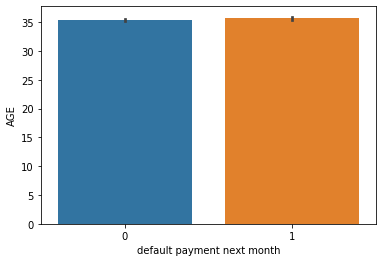

In [18]:
sns.barplot(x='default payment next month',y='AGE',data=credit_data)

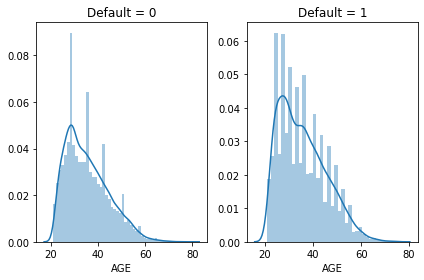

In [19]:
# Distribution of Age by Defaulters and Non Defaulters
fig,axes = plt.subplots(nrows=1, ncols=2)
sns.distplot(credit_data[credit_data['default payment next month'] == 0]['AGE'],ax=axes[0])
axes[0].set_title('Default = 0')
sns.distplot(credit_data[credit_data['default payment next month'] == 1]['AGE'],ax=axes[1])
axes[1].set_title('Default = 1')
plt.tight_layout()

Text(0.5, 1, 'Distribution of AGE by defaulter status')

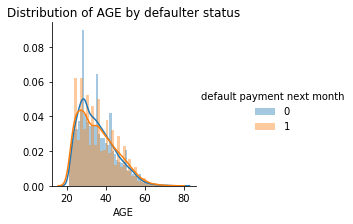

In [20]:
g = sns.FacetGrid(data=credit_data, hue='default payment next month')
g.map(sns.distplot, 'AGE').add_legend()
plt.title('Distribution of AGE by defaulter status')

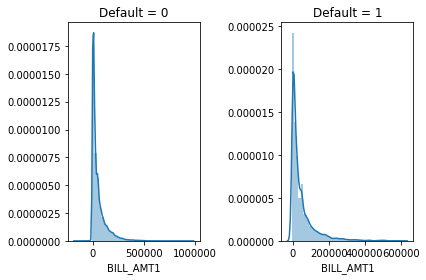

In [21]:
# Explore last six monthx bill amounts by defaulter status

fig,axes = plt.subplots(nrows=1, ncols=2)
sns.distplot(credit_data[credit_data['default payment next month'] == 0]['BILL_AMT1'],ax=axes[0])
axes[0].set_title('Default = 0')
sns.distplot(credit_data[credit_data['default payment next month'] == 1]['BILL_AMT1'],ax=axes[1])
axes[1].set_title('Default = 1')
plt.tight_layout()

In [3]:
# We will introduce two average variables for BILL_AMTs and PAY_AMTS and will consider only the average values

BILL_AMOUNTS = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
credit_data['AVG_BILL_AMT'] = credit_data[BILL_AMOUNTS].apply(lambda x:np.mean(x), axis=1)

PAY_AMOUNTS = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
credit_data['AVG_PAY_AMT'] = credit_data[PAY_AMOUNTS].apply(lambda x:np.mean(x), axis=1)

credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AVG_BILL_AMT,AVG_PAY_AMT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1284.000000,114.833333
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,2846.166667,833.333333
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,16942.166667,1836.333333
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,38555.666667,1398.000000
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,18223.166667,9841.500000


In [23]:
# Explore AVERAGE_BILL_AMT

credit_data.groupby('default payment next month').describe()['AVG_BILL_AMT']

,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,22996.0,45233.033093,62781.112724,-20913.333333,5009.625,21343.666667,58127.458333,877313.833333
1,6605.0,43381.514434,64315.605434,-56043.166667,3753.500,19748.666667,51001.500000,521248.333333


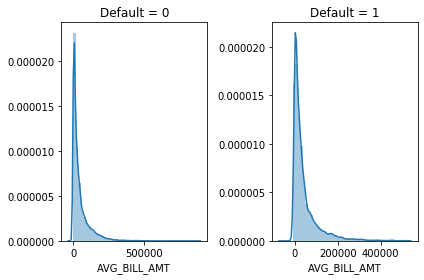

In [24]:
# Distribution of AVG_BILL_AMT by Defaulters and Non Defaulters

fig,axes = plt.subplots(nrows=1, ncols=2)
sns.distplot(credit_data[credit_data['default payment next month'] == 0]['AVG_BILL_AMT'],ax=axes[0])
axes[0].set_title('Default = 0')
sns.distplot(credit_data[credit_data['default payment next month'] == 1]['AVG_BILL_AMT'],ax=axes[1])
axes[1].set_title('Default = 1')
plt.tight_layout()

Text(0.5, 1, 'Distribution of AVG_BILL_AMT by defaulter status')

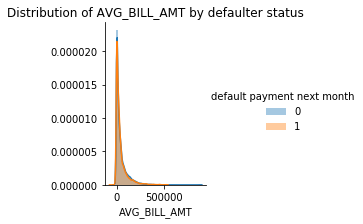

In [25]:
g = sns.FacetGrid(data=credit_data, hue='default payment next month')
g.map(sns.distplot, 'AVG_BILL_AMT').add_legend()
plt.title('Distribution of AVG_BILL_AMT by defaulter status')

In [26]:
# Explore AVG_PAY_AMT

credit_data.groupby('default payment next month').describe()['AVG_PAY_AMT']

,count,mean,std,min,25%,50%,75%,max
default payment next month,,,,,,,,
0,22996.0,5816.977612,10958.576724,0.0,1241.791667,2752.083333,6177.916667,627344.333333
1,6605.0,3311.698738,6122.613311,0.0,805.666667,1607.666667,3533.333333,117368.000000


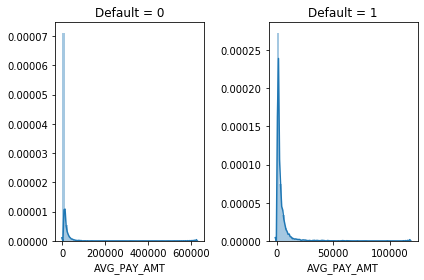

In [27]:
# Distribution of AVG_PAY_AMT by Defaulters and Non Defaulters

fig,axes = plt.subplots(nrows=1, ncols=2)
sns.distplot(credit_data[credit_data['default payment next month'] == 0]['AVG_PAY_AMT'],ax=axes[0])
axes[0].set_title('Default = 0')
sns.distplot(credit_data[credit_data['default payment next month'] == 1]['AVG_PAY_AMT'],ax=axes[1])
axes[1].set_title('Default = 1')
plt.tight_layout()

Text(0.5, 1, 'Distribution of AVG_PAY_AMT by defaulter status')

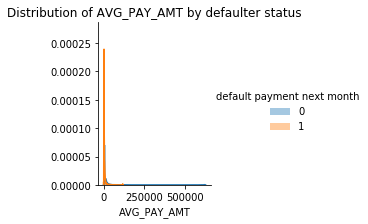

In [28]:
g = sns.FacetGrid(data=credit_data, hue='default payment next month')
g.map(sns.distplot, 'AVG_PAY_AMT').add_legend()
plt.title('Distribution of AVG_PAY_AMT by defaulter status')

### Data Preprocessing

In [4]:
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AVG_BILL_AMT', 'AVG_PAY_AMT'],
      dtype='object')

In [5]:
# create feature variable set and target variable
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'AVG_BILL_AMT', 'AVG_PAY_AMT']
features = credit_data[feature_cols].values
target = credit_data['default payment next month'].values

Since, We dont have any non-numerical variable, we dont need to perform any label encoding and since our variables are ordinal, as they have a relational order and we dont need one hot encoding

In [6]:
# Now we will split the dataset into training and test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3,
                                                                           random_state=101)

In [7]:
# perform feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)
print('Scaled features in training set')
print(features_train)

Scaled features in training set
[[ 0.24519774 -1.24178073 -1.15187749 ... -0.62905323 -0.39633561
   1.50670536]
 [ 1.7792106   0.80529515 -1.15187749 ... -0.62905323 -0.33986887
   1.57467636]
 [-0.9053119   0.80529515  0.25197532 ... -0.62905323 -0.23812327
  -0.03905095]
 ...
 [-0.13830547 -1.24178073 -1.15187749 ...  0.23745275  0.21597988
  -0.37435999]
 [ 0.55200031 -1.24178073 -1.15187749 ...  1.97046472 -0.66304456
  -0.26001117]
 [-0.9053119   0.80529515  1.65582813 ...  1.97046472  0.06406729
  -0.2662229 ]]


### Build the ANN

In [33]:
# import the libraries

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [34]:
# Initialize the ANN

classifier = Sequential()

In [35]:
features.shape

(29601, 13)

In [36]:
# Adding the input layer and the first hidden layer of the neural network

classifier.add(Dense(activation='relu', input_dim=13, units=7, kernel_initializer='uniform'))

In [37]:
# Adding the second hidden layer

classifier.add(Dense(activation='relu', units=7, kernel_initializer='uniform'))

In [38]:
# Adding the output layer

classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

In [39]:
# Compiling the ANN

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Making Predictions and Evaluating the model

In [40]:
# Fitting the ANN into the training set

classifier.fit(x=features_train, y=target_train, batch_size=10, epochs=100, verbose=1)

Epoch 1/100
20720/20720 [==============================] - 5s 240us/step - loss: 0.4749 - accuracy: 0.8034
Epoch 2/100
20720/20720 [==============================] - 5s 226us/step - loss: 0.4501 - accuracy: 0.8145
Epoch 3/100
20720/20720 [==============================] - 5s 225us/step - loss: 0.4483 - accuracy: 0.8155
Epoch 4/100
20720/20720 [==============================] - 5s 225us/step - loss: 0.4472 - accuracy: 0.8156
Epoch 5/100
20720/20720 [==============================] - 5s 223us/step - loss: 0.4463 - accuracy: 0.8164
Epoch 6/100
20720/20720 [==============================] - 5s 223us/step - loss: 0.4457 - accuracy: 0.8159
Epoch 7/100
20720/20720 [==============================] - 5s 225us/step - loss: 0.4446 - accuracy: 0.8170
Epoch 8/100
20720/20720 [==============================] - 5s 225us/step - loss: 0.4439 - accuracy: 0.8167
Epoch 9/100
20720/20720 [==============================] - 5s 223us/step - loss: 0.4424 - accuracy: 0.8172
Epoch 10/100
20720/20720 [===========

Epoch 77/100
20720/20720 [==============================] - 5s 220us/step - loss: 0.4324 - accuracy: 0.8191
Epoch 78/100
20720/20720 [==============================] - 5s 221us/step - loss: 0.4327 - accuracy: 0.8192
Epoch 79/100
20720/20720 [==============================] - 5s 222us/step - loss: 0.4323 - accuracy: 0.8194
Epoch 80/100
20720/20720 [==============================] - 5s 221us/step - loss: 0.4322 - accuracy: 0.8197
Epoch 81/100
20720/20720 [==============================] - 5s 223us/step - loss: 0.4325 - accuracy: 0.8188
Epoch 82/100
20720/20720 [==============================] - 5s 222us/step - loss: 0.4322 - accuracy: 0.8191
Epoch 83/100
20720/20720 [==============================] - 5s 220us/step - loss: 0.4323 - accuracy: 0.8188
Epoch 84/100
20720/20720 [==============================] - 5s 221us/step - loss: 0.4322 - accuracy: 0.8190
Epoch 85/100
20720/20720 [==============================] - 5s 222us/step - loss: 0.4323 - accuracy: 0.8195
Epoch 86/100
20720/20720 [==

In [41]:
# predicting the test results

target_predictions = classifier.predict(features_test)
target_predictions

array([[0.13418892],
       [0.6363374 ],
       [0.8356948 ],
       ...,
       [0.11914766],
       [0.7562989 ],
       [0.45882544]], dtype=float32)

In [42]:
# So the target_predictions has probabilities, in order to use it in confusion matrix

target_predictions = (target_predictions > 0.5)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Confusion Matrix')
print(confusion_matrix(target_test, target_predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, target_predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, target_predictions))

Confusion Matrix
[[6573  356]
 [1218  734]]


Accuracy Score
0.8227677063393762


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6929
           1       0.67      0.38      0.48      1952

    accuracy                           0.82      8881
   macro avg       0.76      0.66      0.69      8881
weighted avg       0.81      0.82      0.80      8881



### Evaluating, Improving and Tuning the ANN

#### Implementing the K-Fold cross validation - Evaluating the model

In [7]:
# Evaluating the model

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(activation='relu', input_dim=13, units=7, kernel_initializer='uniform'))
    classifier.add(Dense(activation='relu', units=7, kernel_initializer='uniform'))
    classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, epochs=100)

Using TensorFlow backend.


In [8]:
# Run the K-Fold cross validation

from datetime import datetime
start = datetime.now()
accuracies = cross_val_score(estimator=classifier, X=features_train, y=target_train, cv=10, n_jobs=-2, verbose=1)
end = datetime.now()
print("Time Taken :", (end-start))

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  10 | elapsed:  3.2min remaining:  7.6min


Time Taken : 0:03:17.014830


[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:  3.3min finished


In [9]:
# relevant accuracy and variance for the model

print("Accuracy of the model")
print(accuracies.mean())
print("Variance of the model")
print(accuracies.std())

Accuracy of the model
0.8160714268684387
Variance of the model
0.008022192578921186


Since the variance is very low, we dont need to implement Dropout regularization

### Tuning the ANN - Parameter tuning

In [8]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(activation='relu', input_dim=13, units=7, kernel_initializer='uniform'))
    classifier.add(Dense(activation='relu', units=7, kernel_initializer='uniform'))
    classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier)

# create a dictionary with hyper parameters
params = {'batch_size': [25, 50], 'epochs': [25, 50,], 'optimizer': ['adam', 'rmsprop']}
# create the grid search object - with the number of folds for k-fold cross validation
# scoring of each of the param in params dictionary will happen based on accuracy
grid_search = GridSearchCV(estimator=classifier, param_grid=params, scoring='accuracy', cv=10, verbose=1)
# we will now fit this grid_search object onto our training sets
grid_search = grid_search.fit(features_train, target_train)

# Now to get the best selection of parameters and best accuracy
print("Best Parameters")
best_params = grid_search.best_params_
print(best_params)
print("Best Accuracy")
best_accuracy=grid_search.best_score_
print(best_accuracy)

Using TensorFlow backend.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Epoch 1/25
18648/18648 [==============================] - 2s 110us/step - loss: 0.5105 - accuracy: 0.7774
Epoch 2/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4587 - accuracy: 0.7781
Epoch 3/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4527 - accuracy: 0.8142
Epoch 4/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4501 - accuracy: 0.8156
Epoch 5/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4483 - accuracy: 0.8155
Epoch 6/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4470 - accuracy: 0.8160
Epoch 7/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4464 - accuracy: 0.8152
Epoch 8/25
18648/18648 [==============================] - 2s 93us/step - loss: 0.4458 - accuracy: 0.8171
Epoch 9/25
18648/18648 [==============================] - 2s 93us/step - loss: 0.4453 - accuracy: 

Epoch 3/25
18648/18648 [==============================] - 2s 88us/step - loss: 0.4498 - accuracy: 0.8158
Epoch 4/25
18648/18648 [==============================] - 2s 89us/step - loss: 0.4485 - accuracy: 0.8167
Epoch 5/25
18648/18648 [==============================] - 2s 90us/step - loss: 0.4477 - accuracy: 0.8164
Epoch 6/25
18648/18648 [==============================] - 2s 90us/step - loss: 0.4469 - accuracy: 0.8168
Epoch 7/25
18648/18648 [==============================] - 2s 91us/step - loss: 0.4466 - accuracy: 0.8168
Epoch 8/25
18648/18648 [==============================] - 2s 90us/step - loss: 0.4460 - accuracy: 0.8168
Epoch 9/25
18648/18648 [==============================] - 2s 89us/step - loss: 0.4457 - accuracy: 0.8172
Epoch 10/25
18648/18648 [==============================] - 2s 90us/step - loss: 0.4454 - accuracy: 0.8169
Epoch 11/25
18648/18648 [==============================] - 2s 90us/step - loss: 0.4452 - accuracy: 0.8164
Epoch 12/25
18648/18648 [============================

18648/18648 [==============================] - 2s 93us/step - loss: 0.4472 - accuracy: 0.8140
Epoch 8/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4465 - accuracy: 0.8154
Epoch 9/25
18648/18648 [==============================] - 2s 93us/step - loss: 0.4458 - accuracy: 0.8152
Epoch 10/25
18648/18648 [==============================] - 2s 94us/step - loss: 0.4450 - accuracy: 0.8154
Epoch 11/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4442 - accuracy: 0.8156
Epoch 12/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4430 - accuracy: 0.8162
Epoch 13/25
18648/18648 [==============================] - 2s 93us/step - loss: 0.4426 - accuracy: 0.8167
Epoch 14/25
18648/18648 [==============================] - 2s 93us/step - loss: 0.4416 - accuracy: 0.8171
Epoch 15/25
18648/18648 [==============================] - 2s 92us/step - loss: 0.4408 - accuracy: 0.8168
Epoch 16/25
18648/18648 [==============================] - 2

18648/18648 [==============================] - 2s 85us/step - loss: 0.4475 - accuracy: 0.8159
Epoch 12/25
18648/18648 [==============================] - 2s 86us/step - loss: 0.4474 - accuracy: 0.8165
Epoch 13/25
18648/18648 [==============================] - 2s 84us/step - loss: 0.4467 - accuracy: 0.8167
Epoch 14/25
18648/18648 [==============================] - 2s 85us/step - loss: 0.4467 - accuracy: 0.8162
Epoch 15/25
18648/18648 [==============================] - 2s 85us/step - loss: 0.4464 - accuracy: 0.8160
Epoch 16/25
18648/18648 [==============================] - 2s 85us/step - loss: 0.4466 - accuracy: 0.8155
Epoch 17/25
18648/18648 [==============================] - 2s 85us/step - loss: 0.4465 - accuracy: 0.8160
Epoch 18/25
18648/18648 [==============================] - 2s 85us/step - loss: 0.4461 - accuracy: 0.8171
Epoch 19/25
18648/18648 [==============================] - 2s 84us/step - loss: 0.4460 - accuracy: 0.8175
Epoch 20/25
18648/18648 [==============================] -

18648/18648 [==============================] - 2s 94us/step - loss: 0.4330 - accuracy: 0.8192
Epoch 41/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4330 - accuracy: 0.8196
Epoch 42/50
18648/18648 [==============================] - 2s 93us/step - loss: 0.4329 - accuracy: 0.8193
Epoch 43/50
18648/18648 [==============================] - 2s 93us/step - loss: 0.4331 - accuracy: 0.8197
Epoch 44/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4326 - accuracy: 0.8193
Epoch 45/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4326 - accuracy: 0.8197
Epoch 46/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4324 - accuracy: 0.8190
Epoch 47/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4322 - accuracy: 0.8197
Epoch 48/50
18648/18648 [==============================] - 2s 91us/step - loss: 0.4322 - accuracy: 0.8196
Epoch 49/50
18648/18648 [==============================] -

18648/18648 [==============================] - 2s 90us/step - loss: 0.4342 - accuracy: 0.8204
Epoch 45/50
18648/18648 [==============================] - 2s 91us/step - loss: 0.4336 - accuracy: 0.8197
Epoch 46/50
18648/18648 [==============================] - 2s 90us/step - loss: 0.4342 - accuracy: 0.8199
Epoch 47/50
18648/18648 [==============================] - 2s 91us/step - loss: 0.4341 - accuracy: 0.8196
Epoch 48/50
18648/18648 [==============================] - 2s 91us/step - loss: 0.4341 - accuracy: 0.8198
Epoch 49/50
18648/18648 [==============================] - 2s 91us/step - loss: 0.4338 - accuracy: 0.8211
Epoch 50/50
18648/18648 [==============================] - 2s 90us/step - loss: 0.4337 - accuracy: 0.8209
Epoch 1/50
18648/18648 [==============================] - 2s 97us/step - loss: 0.5002 - accuracy: 0.7971
Epoch 2/50
18648/18648 [==============================] - 2s 93us/step - loss: 0.4489 - accuracy: 0.8144
Epoch 3/50
18648/18648 [==============================] - 2s

18648/18648 [==============================] - 2s 89us/step - loss: 0.4414 - accuracy: 0.8181
Epoch 49/50
18648/18648 [==============================] - 2s 90us/step - loss: 0.4415 - accuracy: 0.8183
Epoch 50/50
18648/18648 [==============================] - 2s 89us/step - loss: 0.4415 - accuracy: 0.8189
Epoch 1/50
18648/18648 [==============================] - 2s 96us/step - loss: 0.5276 - accuracy: 0.7739
Epoch 2/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4743 - accuracy: 0.7946
Epoch 3/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4643 - accuracy: 0.8142
Epoch 4/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4593 - accuracy: 0.8169
Epoch 5/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4558 - accuracy: 0.8161
Epoch 6/50
18648/18648 [==============================] - 2s 92us/step - loss: 0.4528 - accuracy: 0.8160
Epoch 7/50
18648/18648 [==============================] - 2s 93u

18648/18648 [==============================] - 2s 85us/step - loss: 0.4613 - accuracy: 0.7777
Epoch 3/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4543 - accuracy: 0.8132
Epoch 4/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4514 - accuracy: 0.8167
Epoch 5/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4493 - accuracy: 0.8170
Epoch 6/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4479 - accuracy: 0.8165
Epoch 7/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4468 - accuracy: 0.8165
Epoch 8/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4462 - accuracy: 0.8164
Epoch 9/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4456 - accuracy: 0.8165
Epoch 10/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4453 - accuracy: 0.8170
Epoch 11/50
18648/18648 [==============================] - 2s 84u

18648/18648 [==============================] - 2s 85us/step - loss: 0.4469 - accuracy: 0.8169
Epoch 7/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4466 - accuracy: 0.8176
Epoch 8/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4462 - accuracy: 0.8177
Epoch 9/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4457 - accuracy: 0.8175
Epoch 10/50
18648/18648 [==============================] - 2s 87us/step - loss: 0.4452 - accuracy: 0.8172
Epoch 11/50
18648/18648 [==============================] - 2s 87us/step - loss: 0.4447 - accuracy: 0.8169
Epoch 12/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4443 - accuracy: 0.8178
Epoch 13/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4438 - accuracy: 0.8180
Epoch 14/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4427 - accuracy: 0.8190
Epoch 15/50
18648/18648 [==============================] - 2s

18648/18648 [==============================] - 2s 85us/step - loss: 0.4683 - accuracy: 0.8107
Epoch 11/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4684 - accuracy: 0.8108
Epoch 12/50
18648/18648 [==============================] - 2s 84us/step - loss: 0.4681 - accuracy: 0.8103
Epoch 13/50
18648/18648 [==============================] - 2s 84us/step - loss: 0.4684 - accuracy: 0.8094
Epoch 14/50
18648/18648 [==============================] - 2s 84us/step - loss: 0.4681 - accuracy: 0.8105
Epoch 15/50
18648/18648 [==============================] - 2s 84us/step - loss: 0.4683 - accuracy: 0.8104
Epoch 16/50
18648/18648 [==============================] - 2s 84us/step - loss: 0.4680 - accuracy: 0.8099
Epoch 17/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4682 - accuracy: 0.8104
Epoch 18/50
18648/18648 [==============================] - 2s 84us/step - loss: 0.4682 - accuracy: 0.8104
Epoch 19/50
18648/18648 [==============================] -

18648/18648 [==============================] - 2s 85us/step - loss: 0.4411 - accuracy: 0.8172
Epoch 15/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4404 - accuracy: 0.8174
Epoch 16/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4400 - accuracy: 0.8180
Epoch 17/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4398 - accuracy: 0.8175
Epoch 18/50
18648/18648 [==============================] - 2s 85us/step - loss: 0.4396 - accuracy: 0.8179
Epoch 19/50
18648/18648 [==============================] - 2s 86us/step - loss: 0.4394 - accuracy: 0.8188
Epoch 20/50
18648/18648 [==============================] - 2s 87us/step - loss: 0.4392 - accuracy: 0.8168
Epoch 21/50
18648/18648 [==============================] - 2s 87us/step - loss: 0.4389 - accuracy: 0.8184
Epoch 22/50
18648/18648 [==============================] - 2s 88us/step - loss: 0.4385 - accuracy: 0.8182
Epoch 23/50
18648/18648 [==============================] -

18648/18648 [==============================] - 1s 46us/step - loss: 0.4407 - accuracy: 0.8173
Epoch 19/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4404 - accuracy: 0.8178
Epoch 20/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4406 - accuracy: 0.8179
Epoch 21/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4404 - accuracy: 0.8176
Epoch 22/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4403 - accuracy: 0.8189
Epoch 23/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4402 - accuracy: 0.8187
Epoch 24/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4399 - accuracy: 0.8182
Epoch 25/25
18648/18648 [==============================] - 1s 47us/step - loss: 0.4404 - accuracy: 0.8178
Epoch 1/25
18648/18648 [==============================] - 1s 51us/step - loss: 0.5438 - accuracy: 0.7822
Epoch 2/25
18648/18648 [==============================] - 1

18648/18648 [==============================] - 1s 43us/step - loss: 0.4423 - accuracy: 0.8191
Epoch 23/25
18648/18648 [==============================] - 1s 44us/step - loss: 0.4421 - accuracy: 0.8185
Epoch 24/25
18648/18648 [==============================] - 1s 43us/step - loss: 0.4416 - accuracy: 0.8183
Epoch 25/25
18648/18648 [==============================] - 1s 44us/step - loss: 0.4414 - accuracy: 0.8184
Epoch 1/25
18648/18648 [==============================] - 1s 50us/step - loss: 0.5522 - accuracy: 0.7750
Epoch 2/25
18648/18648 [==============================] - 1s 44us/step - loss: 0.4720 - accuracy: 0.7750
Epoch 3/25
18648/18648 [==============================] - 1s 44us/step - loss: 0.4613 - accuracy: 0.7750
Epoch 4/25
18648/18648 [==============================] - 1s 44us/step - loss: 0.4563 - accuracy: 0.8058
Epoch 5/25
18648/18648 [==============================] - 1s 43us/step - loss: 0.4532 - accuracy: 0.8131
Epoch 6/25
18648/18648 [==============================] - 1s 43

18648/18648 [==============================] - 1s 53us/step - loss: 0.5769 - accuracy: 0.7732
Epoch 2/25
18648/18648 [==============================] - 1s 48us/step - loss: 0.4684 - accuracy: 0.8024
Epoch 3/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4544 - accuracy: 0.8131
Epoch 4/25
18648/18648 [==============================] - 1s 45us/step - loss: 0.4523 - accuracy: 0.8150
Epoch 5/25
18648/18648 [==============================] - 1s 45us/step - loss: 0.4514 - accuracy: 0.8153
Epoch 6/25
18648/18648 [==============================] - 1s 45us/step - loss: 0.4507 - accuracy: 0.8157
Epoch 7/25
18648/18648 [==============================] - 1s 45us/step - loss: 0.4503 - accuracy: 0.8163
Epoch 8/25
18648/18648 [==============================] - 1s 46us/step - loss: 0.4500 - accuracy: 0.8167
Epoch 9/25
18648/18648 [==============================] - 1s 44us/step - loss: 0.4500 - accuracy: 0.8160
Epoch 10/25
18648/18648 [==============================] - 1s 44us

18648/18648 [==============================] - 1s 46us/step - loss: 0.4421 - accuracy: 0.8164
Epoch 31/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4417 - accuracy: 0.8165
Epoch 32/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4415 - accuracy: 0.8154
Epoch 33/50
18648/18648 [==============================] - 1s 45us/step - loss: 0.4410 - accuracy: 0.8168
Epoch 34/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4407 - accuracy: 0.8162
Epoch 35/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4405 - accuracy: 0.8163
Epoch 36/50
18648/18648 [==============================] - 1s 45us/step - loss: 0.4400 - accuracy: 0.8158
Epoch 37/50
18648/18648 [==============================] - 1s 47us/step - loss: 0.4399 - accuracy: 0.8162
Epoch 38/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4400 - accuracy: 0.8169
Epoch 39/50
18648/18648 [==============================] -

18648/18648 [==============================] - 1s 47us/step - loss: 0.4398 - accuracy: 0.8180
Epoch 35/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4398 - accuracy: 0.8186
Epoch 36/50
18648/18648 [==============================] - 1s 47us/step - loss: 0.4397 - accuracy: 0.8184
Epoch 37/50
18648/18648 [==============================] - 1s 47us/step - loss: 0.4395 - accuracy: 0.8177
Epoch 38/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4399 - accuracy: 0.8182
Epoch 39/50
18648/18648 [==============================] - 1s 47us/step - loss: 0.4393 - accuracy: 0.8187
Epoch 40/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4398 - accuracy: 0.8182
Epoch 41/50
18648/18648 [==============================] - 1s 47us/step - loss: 0.4395 - accuracy: 0.8185
Epoch 42/50
18648/18648 [==============================] - 1s 48us/step - loss: 0.4396 - accuracy: 0.8183
Epoch 43/50
18648/18648 [==============================] -

18648/18648 [==============================] - 1s 46us/step - loss: 0.4439 - accuracy: 0.8172
Epoch 39/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4438 - accuracy: 0.8163
Epoch 40/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4435 - accuracy: 0.8169
Epoch 41/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4436 - accuracy: 0.8169
Epoch 42/50
18648/18648 [==============================] - 1s 45us/step - loss: 0.4436 - accuracy: 0.8164
Epoch 43/50
18648/18648 [==============================] - 1s 46us/step - loss: 0.4438 - accuracy: 0.8169
Epoch 44/50
18648/18648 [==============================] - 1s 45us/step - loss: 0.4436 - accuracy: 0.8167
Epoch 45/50
18648/18648 [==============================] - 1s 45us/step - loss: 0.4436 - accuracy: 0.8164
Epoch 46/50
18648/18648 [==============================] - 1s 45us/step - loss: 0.4433 - accuracy: 0.8170
Epoch 47/50
18648/18648 [==============================] -

Epoch 42/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4413 - accuracy: 0.8174
Epoch 43/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4411 - accuracy: 0.8181
Epoch 44/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4415 - accuracy: 0.8179
Epoch 45/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4412 - accuracy: 0.8182
Epoch 46/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4412 - accuracy: 0.8179
Epoch 47/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4412 - accuracy: 0.8183
Epoch 48/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4414 - accuracy: 0.8177
Epoch 49/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4410 - accuracy: 0.8174
Epoch 50/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4410 - accuracy: 0.8182
Epoch 1/50
18648/18648 [======================

18648/18648 [==============================] - 1s 43us/step - loss: 0.4671 - accuracy: 0.8123
Epoch 47/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4669 - accuracy: 0.8117
Epoch 48/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4671 - accuracy: 0.8118
Epoch 49/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4671 - accuracy: 0.8109
Epoch 50/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4668 - accuracy: 0.8126
Epoch 1/50
18648/18648 [==============================] - 1s 47us/step - loss: 0.5603 - accuracy: 0.7763
Epoch 2/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4875 - accuracy: 0.7765
Epoch 3/50
18648/18648 [==============================] - 1s 42us/step - loss: 0.4808 - accuracy: 0.7765
Epoch 4/50
18648/18648 [==============================] - 1s 41us/step - loss: 0.4761 - accuracy: 0.7765
Epoch 5/50
18648/18648 [==============================] - 1s 4

18648/18648 [==============================] - 1s 43us/step - loss: 0.4361 - accuracy: 0.8187
Epoch 1/50
18648/18648 [==============================] - 1s 49us/step - loss: 0.5582 - accuracy: 0.7735
Epoch 2/50
18648/18648 [==============================] - 1s 44us/step - loss: 0.4913 - accuracy: 0.7739
Epoch 3/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4851 - accuracy: 0.7739
Epoch 4/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4801 - accuracy: 0.7742
Epoch 5/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4768 - accuracy: 0.7909
Epoch 6/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4749 - accuracy: 0.8007
Epoch 7/50
18648/18648 [==============================] - 1s 44us/step - loss: 0.4738 - accuracy: 0.8030
Epoch 8/50
18648/18648 [==============================] - 1s 43us/step - loss: 0.4732 - accuracy: 0.8046
Epoch 9/50
18648/18648 [==============================] - 1s 44us/

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 63.1min finished


Epoch 1/25
20720/20720 [==============================] - 1s 47us/step - loss: 0.5587 - accuracy: 0.7803
Epoch 2/25
20720/20720 [==============================] - 1s 43us/step - loss: 0.4602 - accuracy: 0.8093
Epoch 3/25
20720/20720 [==============================] - 1s 44us/step - loss: 0.4525 - accuracy: 0.8130
Epoch 4/25
20720/20720 [==============================] - 1s 44us/step - loss: 0.4507 - accuracy: 0.8147
Epoch 5/25
20720/20720 [==============================] - 1s 43us/step - loss: 0.4497 - accuracy: 0.8156
Epoch 6/25
20720/20720 [==============================] - 1s 44us/step - loss: 0.4491 - accuracy: 0.8168
Epoch 7/25
20720/20720 [==============================] - 1s 43us/step - loss: 0.4483 - accuracy: 0.8172
Epoch 8/25
20720/20720 [==============================] - 1s 43us/step - loss: 0.4482 - accuracy: 0.8163
Epoch 9/25
20720/20720 [==============================] - 1s 43us/step - loss: 0.4477 - accuracy: 0.8169
Epoch 10/25
20720/20720 [==============================

In [10]:
# Now to get the best selection of parameters and best accuracy
print("Best Parameters")
best_params = grid_search.best_params_
print(best_params)
print("Best Accuracy")
best_accuracy=grid_search.best_score_
print(best_accuracy)

Best Parameters
{'batch_size': 50, 'epochs': 25, 'optimizer': 'rmsprop'}
Best Accuracy
0.8167471042471043
